In [1]:
!git clone https://github.com/koreal6803/Stocker.git
!pip install -r Stocker/requirements.txt

Cloning into 'Stocker'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Unpacking objects: 100% (10/10), done.
    100% |████████████████████████████████| 36.1MB 491kB/s eta 0:00:01    35% |███████████▎                    | 12.8MB 683kB/s eta 0:00:35    60% |███████████████████▎            | 21.7MB 8.7MB/s eta 0:00:02 60% |███████████████████▍            | 21.8MB 959kB/s eta 0:00:15    81% |██████████████████████████      | 29.4MB 1.7MB/s eta 0:00:05
    100% |████████████████████████████████| 4.9MB 4.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.9MB 665kB/s eta 0:00:01
    100% |████████████████████████████████| 11.3MB 1.6MB/s ta 0:00:011
  Installing build dependencies ... error
  Complete output from command /Users/Dennis/anaconda3/bin/python -m pip install --ignore-installed --no-user --prefix /private/var/folders/rc/hx9rpq_n1wqgzz42y5z82qjc0000gr/T/pip-build-env-ta2hsjma --no-warn-script-location --no-binar

Command "/Users/Dennis/anaconda3/bin/python -m pip install --ignore-installed --no-user --prefix /private/var/folders/rc/hx9rpq_n1wqgzz42y5z82qjc0000gr/T/pip-build-env-ta2hsjma --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools Cython "numpy==1.9.3; python_version=='3.5'" "numpy==1.12.1; python_version=='3.6'" "numpy==1.13.1; python_version>='3.7'"" failed with error code 1 in None


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTETomek
import seaborn as sns

In [6]:
import sys
sys.path

['/Users/Dennis/data_science/python_practice',
 '/Users/Dennis/anaconda3/lib/python37.zip',
 '/Users/Dennis/anaconda3/lib/python3.7',
 '/Users/Dennis/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/Dennis/anaconda3/lib/python3.7/site-packages',
 '/Users/Dennis/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/Dennis/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/Dennis/.ipython']

In [3]:
train = pd.read_csv('/Users/Dennis/Downloads/Pydsci-master/Python_book/16Imbalance/imb_train.csv')
test = pd.read_csv('/Users/Dennis/Downloads/Pydsci-master/Python_book/16Imbalance/imb_test.csv')

In [5]:
X_train = train.loc[:,:'X5']
Y_train = train['cls']
X_test = test.loc[:,:'X5']
Y_test = test['cls']

In [6]:
len(Y_train)/len(Y_test)

2.3333333333333335

0    13644
1      356
Name: cls, dtype: int64


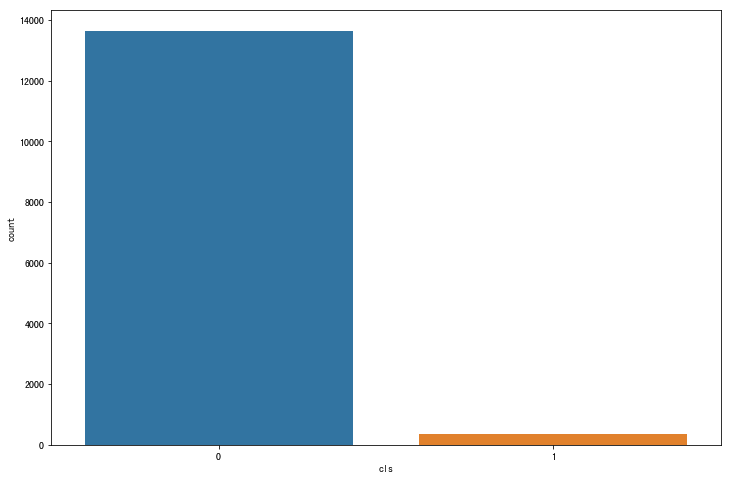

In [16]:
plt.figure(figsize =(12,8))
print(Y_train.value_counts())
sns.countplot(Y_train)

In [15]:
ros = RandomOverSampler(random_state=0 ,ratio='auto')
sos = SMOTE(random_state=0)
kos = SMOTETomek(random_state=0)
x_ros , y_ros = ros.fit_sample(X_train , Y_train)
x_sos , y_sos = sos.fit_sample(X_train , Y_train)
x_kos , Y_kos = kos.fit_sample(X_train , Y_train)
print('ros: %s , sos: %s , kos %s'%(len(x_ros),len(x_sos) , len(x_kos)))

ros: 27288 , sos: 27288 , kos 26790


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = DecisionTreeClassifier(criterion='gini' , random_state=42 , max_leaf_nodes= 4 , max_depth=)
params ={'max_leaf_nodes':[4,6,8,10,12] , 'max_depth':[3,4,5,6]}
cv = GridSearchCV(clf , param_grid=params , scoring='f1')
data = [[X_train , Y_train] ,[x_ros , y_ros] , [x_sos , y_sos ],[x_kos , Y_kos]]
for features , labels in data:
    cv.fit(features , labels)
    predict_test = cv.predict(X_test)
    print('auc:%.3f'%metrics.roc_auc_score(Y_test , predict_test) , 
         'recall:%.3f' %metrics.recall_score(Y_test , predict_test),
         'precision:%.3f' %metrics.precision_score(Y_test , predict_test))